In [1]:
# import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [3]:
import zipfile
with zipfile.ZipFile('../content/creditcard.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('../content/')

In [2]:
data=pd.read_csv('../content/creditcard.csv')

In [3]:
data.shape

(284807, 31)

In [4]:
X = data.loc[:, data.columns != 'Class']
Y = data.Class

In [5]:
#OvererSampling
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
X_OS, Y_OS = oversample.fit_resample(X, Y)

In [6]:
print(X_OS.shape,Y_OS.shape)

(568630, 30) (568630,)


In [7]:
data_OS = pd.concat([X_OS, Y_OS], axis=1)
print(data_OS.shape)
print(data_OS.groupby('Class').size())

(568630, 31)
Class
0    284315
1    284315
dtype: int64


1    284315
0    284315
Name: Class, dtype: int64


C:\Users\Ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


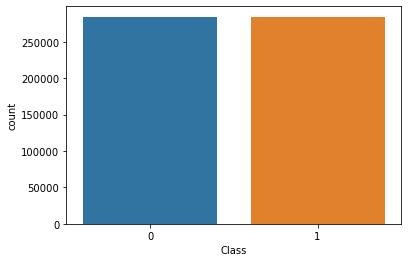

In [8]:
#Fradulent/ Non-Fradulent Samples Plot
y = data_OS["Class"]
sns.countplot(y)
target_temp = data_OS.Class.value_counts()
print(target_temp)

In [9]:
data_OS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    568630 non-null  float64
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

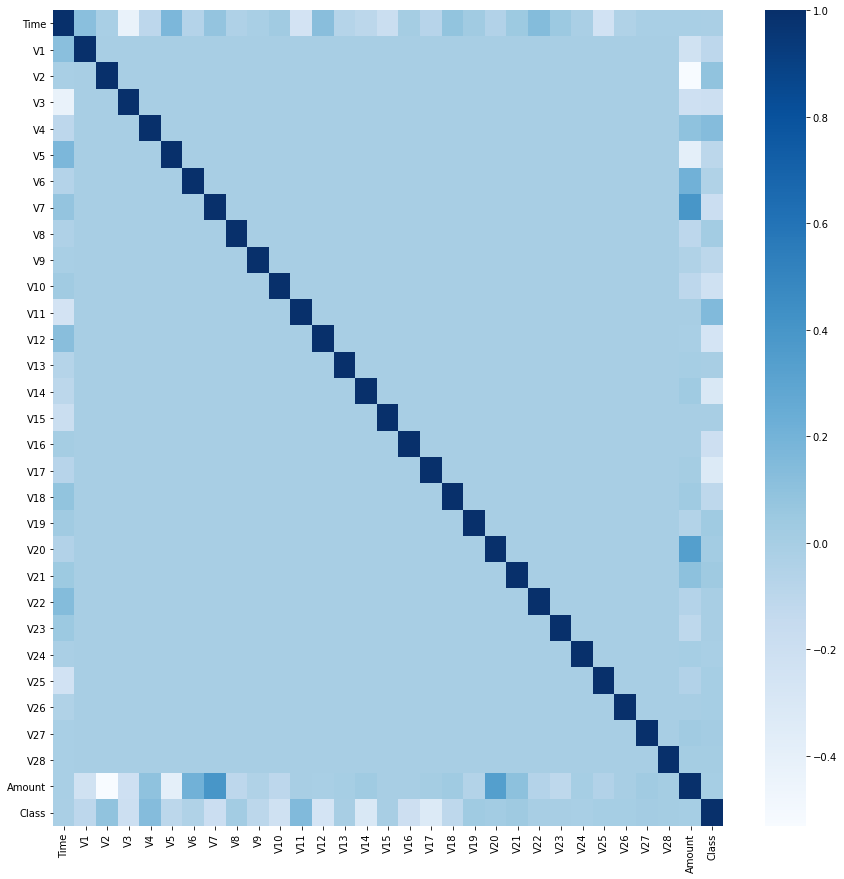

In [10]:
# Correlation map
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), cmap = "Blues")
plt.show()

In [11]:
print(data_OS.corr()["Class"].sort_values(ascending=False))

Class     1.000000
V4        0.710547
V11       0.686368
V2        0.490220
V19       0.267231
V20       0.168026
V21       0.126240
V28       0.083384
V27       0.082991
Amount    0.066300
V8        0.057623
V26       0.054686
V25       0.030286
V22       0.007160
V23      -0.016841
V15      -0.047806
V13      -0.050650
V24      -0.093298
Time     -0.146509
V5       -0.375362
V6       -0.397173
V1       -0.432982
V18      -0.468317
V7       -0.476246
V9       -0.558355
V17      -0.560133
V3       -0.566934
V16      -0.596836
V10      -0.627145
V12      -0.683630
V14      -0.749941
Name: Class, dtype: float64


In [12]:
#Split the dataset into train and test set
from sklearn.model_selection import train_test_split

predictors = data.drop("Class",axis=1)
target = data["Class"]

X_train,X_test,Y_train,Y_test = train_test_split(X_OS,Y_OS,test_size=0.20,random_state=0)

In [13]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(454904, 30) (454904,) (113726, 30) (113726,)


In [14]:
#Random Forest
rf = RandomForestClassifier()
st=time.time()
rf.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_rf=rf.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_rf)))
st=time.time()
Y_pred_rf = rf.predict(X_test)
et=time.time()
print("Pred Time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_rf)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_rf,average='weighted')))
print(classification_report(Y_test,Y_pred_rf))

Training Time: 229.0948507785797
Training Accuracy Score: 1.0
Pred Time: 1.3593857288360596
Testing Accuracy Score: 0.9999648277438756
AUC Score: 0.9999647415556026
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [15]:
#Decision Tree
dt = DecisionTreeClassifier()
st=time.time()
dt.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_dt=dt.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_dt)))
st=time.time()
Y_pred_dt = dt.predict(X_test)
et=time.time()
print("Pred Time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_dt)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_dt,average='weighted')))
print(classification_report(Y_test,Y_pred_dt))

Training Time: 14.10249376296997
Training Accuracy Score: 1.0
Pred Time: 0.022698163986206055
Testing Accuracy Score: 0.9997801733992226
AUC Score: 0.999779634722516
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [16]:
#LDA
lda = LinearDiscriminantAnalysis()
st=time.time()
lda.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_lda=lda.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_lda)))
st=time.time()
Y_pred_lda = lda.predict(X_test)
et=time.time()
print("Pred Time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_lda)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_lda,average='weighted')))
print(classification_report(Y_test,Y_pred_lda))

Training Time: 2.5410218238830566
Training Accuracy Score: 0.9207810878778819
Pred Time: 0.015617132186889648
Testing Accuracy Score: 0.9208536306561385
AUC Score: 0.9210142591873992
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     56724
           1       0.98      0.86      0.92     57002

    accuracy                           0.92    113726
   macro avg       0.93      0.92      0.92    113726
weighted avg       0.93      0.92      0.92    113726



In [17]:
#Logistic Regression
lr = LogisticRegression()
st=time.time()
lr.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_lr=lr.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_lr)))
st=time.time()
Y_pred_lr = lr.predict(X_test)
et=time.time()
print("Pred Time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_lr)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_lr,average='weighted')))
print(classification_report(Y_test,Y_pred_lr))

Training Time: 2.9936044216156006
Training Accuracy Score: 0.9377626927879289
Pred Time: 0.015619993209838867
Testing Accuracy Score: 0.9374637286108718
AUC Score: 0.9375274945908579
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     56724
           1       0.96      0.91      0.94     57002

    accuracy                           0.94    113726
   macro avg       0.94      0.94      0.94    113726
weighted avg       0.94      0.94      0.94    113726



In [18]:
#Naive Bayes Classifier
nb = GaussianNB()
st=time.time()
nb.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_nb=nb.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_nb)))
st=time.time()
Y_pred_nb = nb.predict(X_test)
et=time.time()
print("Pred time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_nb)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_nb,average='weighted')))
print(classification_report(Y_test,Y_pred_nb))

Training Time: 0.26113152503967285
Training Accuracy Score: 0.8649429330144383
Pred time: 0.08386349678039551
Testing Accuracy Score: 0.863346991892795
AUC Score: 0.8636565777685504
              precision    recall  f1-score   support

           0       0.79      0.99      0.88     56724
           1       0.99      0.74      0.84     57002

    accuracy                           0.86    113726
   macro avg       0.89      0.86      0.86    113726
weighted avg       0.89      0.86      0.86    113726



In [19]:
#AdaBoost Classifier
abc = AdaBoostClassifier()
st=time.time()
abc.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_abc=abc.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_abc)))
st=time.time()
Y_pred_abc = abc.predict(X_test)
et=time.time()
print("Pred time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_abc)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_abc,average='weighted')))
print(classification_report(Y_test,Y_pred_abc))

Training Time: 116.19336724281311
Training Accuracy Score: 0.9662873925047922
Pred time: 1.3022785186767578
Testing Accuracy Score: 0.9667973902185956
AUC Score: 0.9668343773462511
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56724
           1       0.98      0.95      0.97     57002

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



In [20]:
#XGBoost Classifier
import xgboost
xgb = xgboost.XGBClassifier(objective="binary:logistic")
st=time.time()
xgb.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_xgb=xgb.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_xgb)))
st=time.time()
Y_pred_xgb = xgb.predict(X_test)
et=time.time()
print("Pred time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_xgb)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_xgb,average='weighted')))
print(classification_report(Y_test,Y_pred_xgb))

Training Time: 118.96628832817078
Training Accuracy Score: 1.0
Pred time: 0.1718733310699463
Testing Accuracy Score: 0.9999296554877513
AUC Score: 0.9999294831112051
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

